In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snc

In [3]:
#Load the data 
df=pd.read_csv("pima_diabetes_data.csv")
#display first 5 rows of the data frame
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
#to know the data 
print("Dataframe info:")
print(df.info())


Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [6]:
#to check for outliers
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [7]:
#missing values in each column
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [9]:
#zeros in glucose,blood pressure,BMI indicate missing values
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros:
    num_zeros = (df[col] == 0).sum()
    print(f"{col} has {num_zeros} zeros.")
#replacing zeros ith nan
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)
# Fill missing values with median
df[cols_with_zeros] = df[cols_with_zeros].fillna(df[cols_with_zeros].median())

Glucose has 5 zeros.
BloodPressure has 35 zeros.
SkinThickness has 227 zeros.
Insulin has 374 zeros.
BMI has 11 zeros.


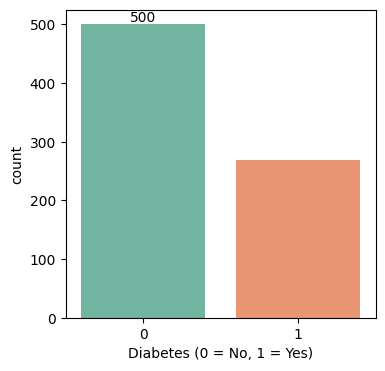

In [19]:
plt.figure(figsize=(4,4))
ax=snc.countplot(data=df,x="Outcome",hue="Outcome",palette=["#66c2a5", "#fc8d62"],legend=False)
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
ax.bar_label(ax.containers[0])
plt.show()

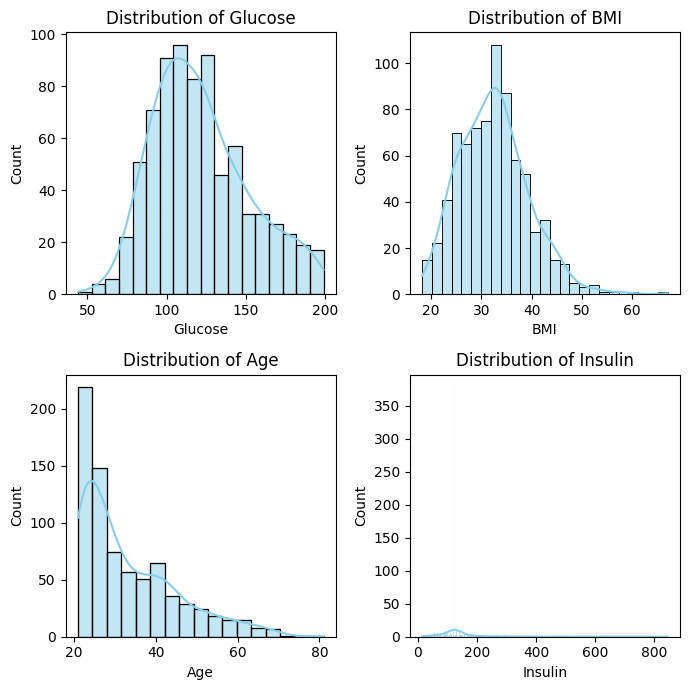

In [28]:
features = ['Glucose', 'BMI', 'Age', 'Insulin']
plt.figure(figsize=(7, 7))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    snc.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

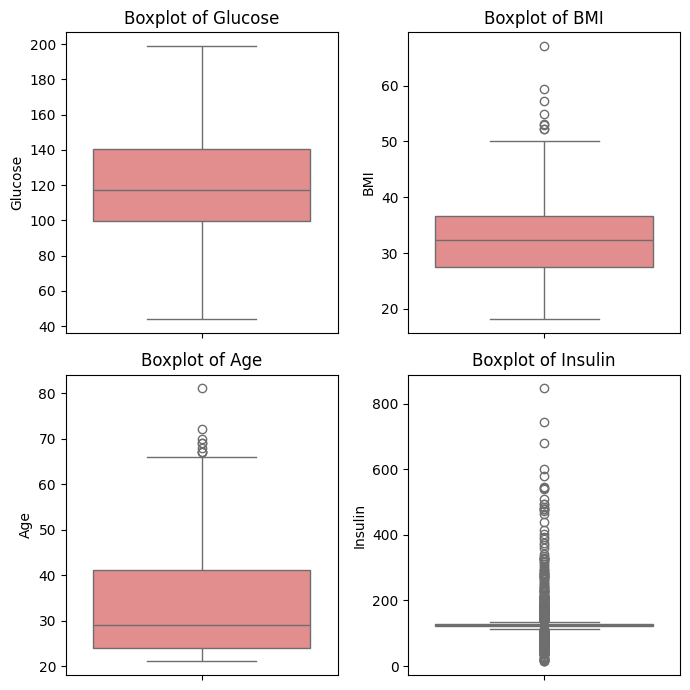

In [29]:
plt.figure(figsize=(7, 7))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    snc.boxplot(y=df[feature], color='lightcoral')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

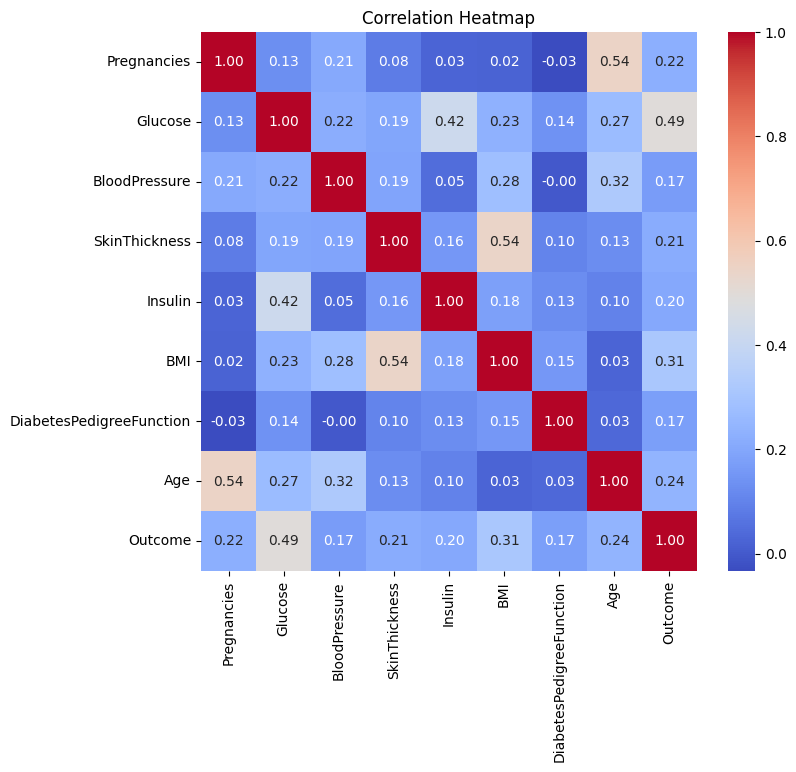

In [30]:
plt.figure(figsize=(8, 7))
snc.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

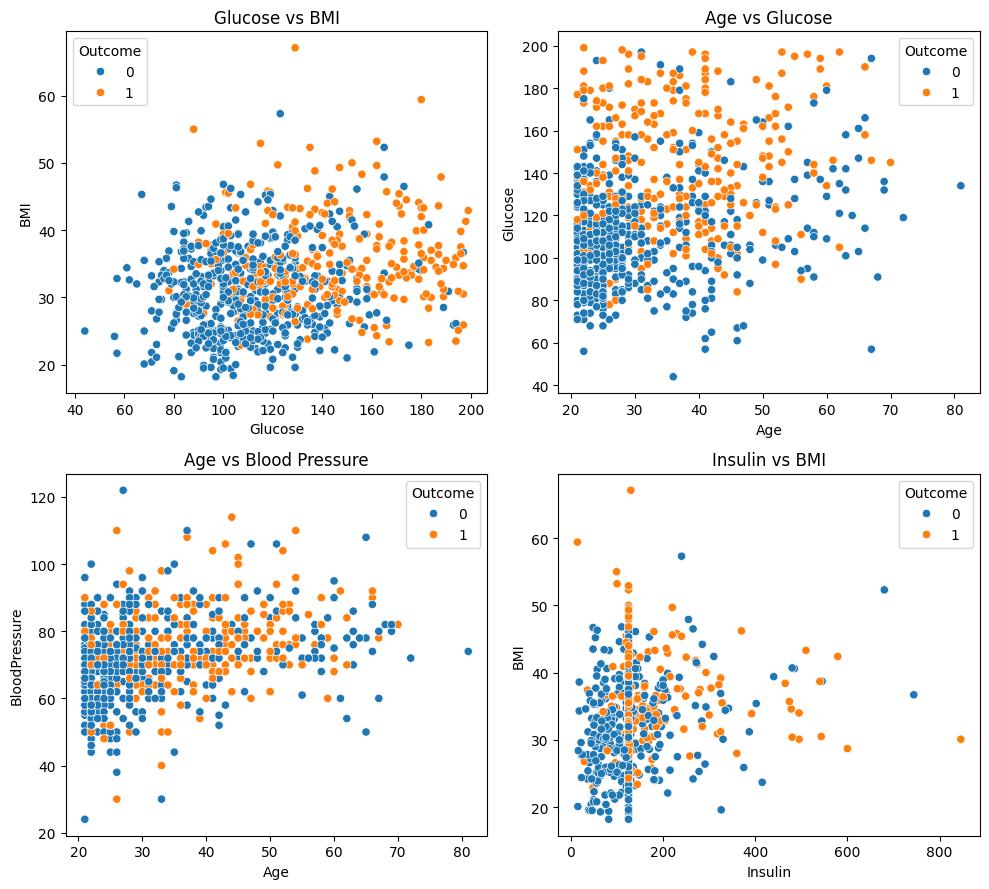

In [31]:
plt.figure(figsize=(10, 9))

plt.subplot(2, 2, 1)
snc.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome')
plt.title('Glucose vs BMI')

plt.subplot(2, 2, 2)
snc.scatterplot(data=df, x='Age', y='Glucose', hue='Outcome')
plt.title('Age vs Glucose')

plt.subplot(2, 2, 3)
snc.scatterplot(data=df, x='Age', y='BloodPressure', hue='Outcome')
plt.title('Age vs Blood Pressure')

plt.subplot(2, 2, 4)
snc.scatterplot(data=df, x='Insulin', y='BMI', hue='Outcome')
plt.title('Insulin vs BMI')

plt.tight_layout()
plt.show()